In [35]:
# Import necesary packages
# ! pip install imbalanced-learn
# ! pip install lazypredict
# ! pip install qiskit
# ! pip install qiskit-machine-learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [36]:
# read the MAWS Department CSV
df = pd.read_csv('maws_data.csv')


In [37]:
df.head()


,_id,Region,District,Municipality,workName,typeOfWork,projectValue,sanctionedDate,startDate_delay,technicalSanctionDate_delay,...,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,Name_of_Approver,Name_of_Commissioner,Name_of_Data_Entry,PhoneNumber_of_Approver,PhoneNumber_of_Commissioner,PhoneNumber_of_Data_Entry
0,4503ff73-16c1-4b3a-9ad6-fa9e98ccedcb,Salem,Salem,Mettur,Supply and Delivery of 80litre Capacity of Sgr...,Solid Waste Management,180000.0,2021-12-30 12:00:00,0,-15.0,...,-14.0,-10.0,227.0,1,Mettur Approver,MAWS Mettur,Mettur DEO,7397396270,7.397396e+09,7010185848
1,27c82745-5979-4ca8-b326-f7a635a19cc5,Tirunelveli,Tirunelveli,Ambasamudram,Supply Delivery and Ereection of Minimast ligh...,Street Lights,400000.0,2022-08-16 12:00:00,0,-30.0,...,10.0,-10.0,-6.0,3,Ambasamudram Approver,MAWS Ambasamudram,Ambasamudram DEO,8220287780,7.397390e+09,9087506154
2,3c9ef0a2-2baf-475c-b608-a7086dbc1f5b,Chengalpattu,Cuddalore,Nellikuppam,Construction of 1 Lakh liter OHT at Viswanatha...,Other Infrastructure,3000000.0,2021-12-02 00:00:00,0,10.0,...,NaN,NaN,NaN,1,Nellikuppam Approver,MAWS Nellikuppam,Nellikuppam DE,9025853037,7.397382e+09,7402675514
3,f265a2ec-9836-4205-9801-6923d66fef2f,Salem,Krishnagiri,Krishnagiri,"Providing BT Surface to Bairava street , Ba...",Roads,8055000.0,2021-12-17 12:00:00,0,6.0,...,238.0,NaN,NaN,0,Krishnagiri Approver,NaN,Krishnagiri DEO,7397396252,NaN,9600227479
4,25dd3e0c-bd98-436e-99b0-4c3a787046a8,Thanjavur,Tiruvarur,Thiruthuraipoondi,Construction of New Bathing Ghat in Annanagar ...,Other Infrastructure,300000.0,2022-07-19 00:00:00,0,0.0,...,-22.0,-10.0,33.0,1,Thiruthuraipoondi Approver,MAWS Thiruthuraipoondi,Thiruthuraipoondi DEO,7397389971,7.397390e+09,9677773760


In [38]:
df = df[df['workName'].notna()]
# print description of the data
df.describe()


,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,technicalBidFinalized_delay,priceBidFinalized_delay,workOrderIssued_delay,agreementDate_delay,workCommenced_delay,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,PhoneNumber_of_Commissioner,PhoneNumber_of_Data_Entry
count,4.989000e+03,4989.0,4966.000000,4961.000000,4952.000000,4881.000000,4861.000000,4843.000000,4830.000000,4644.000000,4287.000000,3893.000000,3538.000000,3134.000000,4989.000000,4.022000e+03,4.989000e+03
mean,7.354811e+06,0.0,8.361458,9.954243,-12.413570,-1.142184,5.550710,-4.697089,43.713458,33.742894,-15.534406,13.622656,21.521198,76.703574,1.150130,7.463341e+09,9.075478e+09
std,5.343219e+07,0.0,899.121503,893.601851,44.982159,44.546088,53.662458,35.792239,112.751285,128.672187,203.271068,209.142008,64.301587,95.819168,0.949882,3.579696e+08,9.019906e+08
min,1.069000e+00,0.0,-1409.000000,-62741.000000,-1103.000000,-376.000000,-1450.000000,-864.000000,-731.000000,-2144.000000,-778.000000,-12078.000000,-546.000000,-415.000000,0.000000,7.358399e+09,6.379775e+09
25%,6.000000e+05,0.0,-15.000000,-3.000000,-20.000000,-3.000000,-5.000000,-7.000000,-4.000000,-12.000000,-57.000000,-15.000000,-11.000000,7.000000,1.000000,7.397382e+09,8.754891e+09
50%,1.300000e+06,0.0,-12.000000,10.000000,-19.000000,-3.000000,-1.000000,-7.000000,6.000000,6.000000,-41.000000,-2.000000,1.000000,47.000000,1.000000,7.397393e+09,9.443699e+09
75%,4.000000e+06,0.0,6.000000,23.000000,-5.000000,-1.000000,7.000000,-6.000000,54.000000,40.000000,-11.000000,22.000000,30.000000,117.000000,1.000000,7.397396e+09,9.786881e+09
max,2.680000e+09,0.0,63047.000000,1260.000000,693.000000,1462.000000,1071.000000,467.000000,2427.000000,1472.000000,11983.000000,1156.000000,1038.000000,797.000000,14.000000,9.843024e+09,9.994822e+09


In [39]:
df = df.drop(['_id', 'workName', 'sanctionedDate', 'PhoneNumber_of_Data_Entry',
              'PhoneNumber_of_Approver', 'PhoneNumber_of_Commissioner',
              'Name_of_Data_Entry','Name_of_Approver','Region', 'District','Name_of_Commissioner'], axis=1)


In [40]:
# Cleanup the data
# df = df.replace(np.nan, 0, regex=True)
# df.fillna(0)
# df = df.replace('', 0, regex=True)
# Drop the duplicate values
df.drop_duplicates()


,Municipality,typeOfWork,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,technicalBidFinalized_delay,priceBidFinalized_delay,workOrderIssued_delay,agreementDate_delay,workCommenced_delay,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded
0,Mettur,Solid Waste Management,180000.0,0,-15.0,0.0,-12.0,-3.0,5.0,-7.0,76.0,-14.0,-64.0,-14.0,-10.0,227.0,1
1,Ambasamudram,Street Lights,400000.0,0,-30.0,-3.0,-12.0,-3.0,-3.0,-7.0,-7.0,-11.0,-49.0,10.0,-10.0,-6.0,3
2,Nellikuppam,Other Infrastructure,3000000.0,0,10.0,110.0,-20.0,0.0,-3.0,-7.0,9.0,223.0,NaN,NaN,NaN,NaN,1
3,Krishnagiri,Roads,8055000.0,0,6.0,5.0,-15.0,-2.0,6.0,-7.0,24.0,24.0,-19.0,238.0,NaN,NaN,0
4,Thiruthuraipoondi,Other Infrastructure,300000.0,0,0.0,-3.0,-20.0,-3.0,15.0,-7.0,-6.0,-22.0,-66.0,-22.0,-10.0,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,Vedaranyam,Water Supply,425300.0,0,-15.0,17.0,-20.0,-3.0,-5.0,-7.0,122.0,-9.0,-41.0,9.0,13.0,19.0,1
4986,Rajapalayam,Roads,2500000.0,0,-14.0,45.0,-20.0,-3.0,25.0,-7.0,10.0,-17.0,-45.0,-10.0,-6.0,186.0,1
4987,Srivilliputhur,Buildings,200000.0,0,-104.0,93.0,-20.0,-3.0,-7.0,-2.0,-5.0,-20.0,-65.0,-21.0,-16.0,131.0,0
4988,Attur,Water Supply,1000000.0,0,-15.0,11.0,-20.0,-3.0,7.0,-7.0,47.0,-31.0,1.0,11.0,188.0,NaN,1


In [41]:
# Cleanup the data

df = df.replace(np.nan, 0, regex=True)
df.fillna(0)
df = df.replace('', 0, regex=True)
# Drop the duplicate values
df=df.drop_duplicates()


In [42]:
#df.groupby('Region').mean()

In [43]:
# df = df.replace(np.nan, 0, regex=True)
# df.fillna(0)
# Calculate Delay
cols = ['technicalSanctionDate_delay',	'tenderAnnounced_delay', 'technicalBidFinalized_delay', 'priceBidFinalized_delay',	'workOrderIssued_delay', 'agreementDate_delay',
        'workCommenced_delay', 'works25CompletedDate_delay', 'works50CompletedDate_delay',	'works75CompletedDate_delay',	'worksFullyCompletedDate_delay',	'paymentFullySettledDate_delay']
for col in cols:
    df['latest_delay'] = df[col].ffill()

df.head(5)


,Municipality,typeOfWork,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,technicalBidFinalized_delay,priceBidFinalized_delay,workOrderIssued_delay,agreementDate_delay,workCommenced_delay,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,latest_delay
0,Mettur,Solid Waste Management,180000.0,0,-15.0,0.0,-12.0,-3.0,5.0,-7.0,76.0,-14.0,-64.0,-14.0,-10.0,227.0,1,227.0
1,Ambasamudram,Street Lights,400000.0,0,-30.0,-3.0,-12.0,-3.0,-3.0,-7.0,-7.0,-11.0,-49.0,10.0,-10.0,-6.0,3,-6.0
2,Nellikuppam,Other Infrastructure,3000000.0,0,10.0,110.0,-20.0,0.0,-3.0,-7.0,9.0,223.0,0.0,0.0,0.0,0.0,1,0.0
3,Krishnagiri,Roads,8055000.0,0,6.0,5.0,-15.0,-2.0,6.0,-7.0,24.0,24.0,-19.0,238.0,0.0,0.0,0,0.0
4,Thiruthuraipoondi,Other Infrastructure,300000.0,0,0.0,-3.0,-20.0,-3.0,15.0,-7.0,-6.0,-22.0,-66.0,-22.0,-10.0,33.0,1,33.0


In [44]:
df.isna().sum().sum()
corr_matrix = df.corr()
df.shape[0]


4902

In [45]:
# Define mask used to cover squares above diagonal
mask = []
for i in range(len(corr_matrix.columns)):
    mask_i = []
    for j in range(len(corr_matrix.columns)):
        if i > j:
            mask_i.append(True)
        else:
            mask_i.append(False)
    mask.append(mask_i)


<AxesSubplot:>

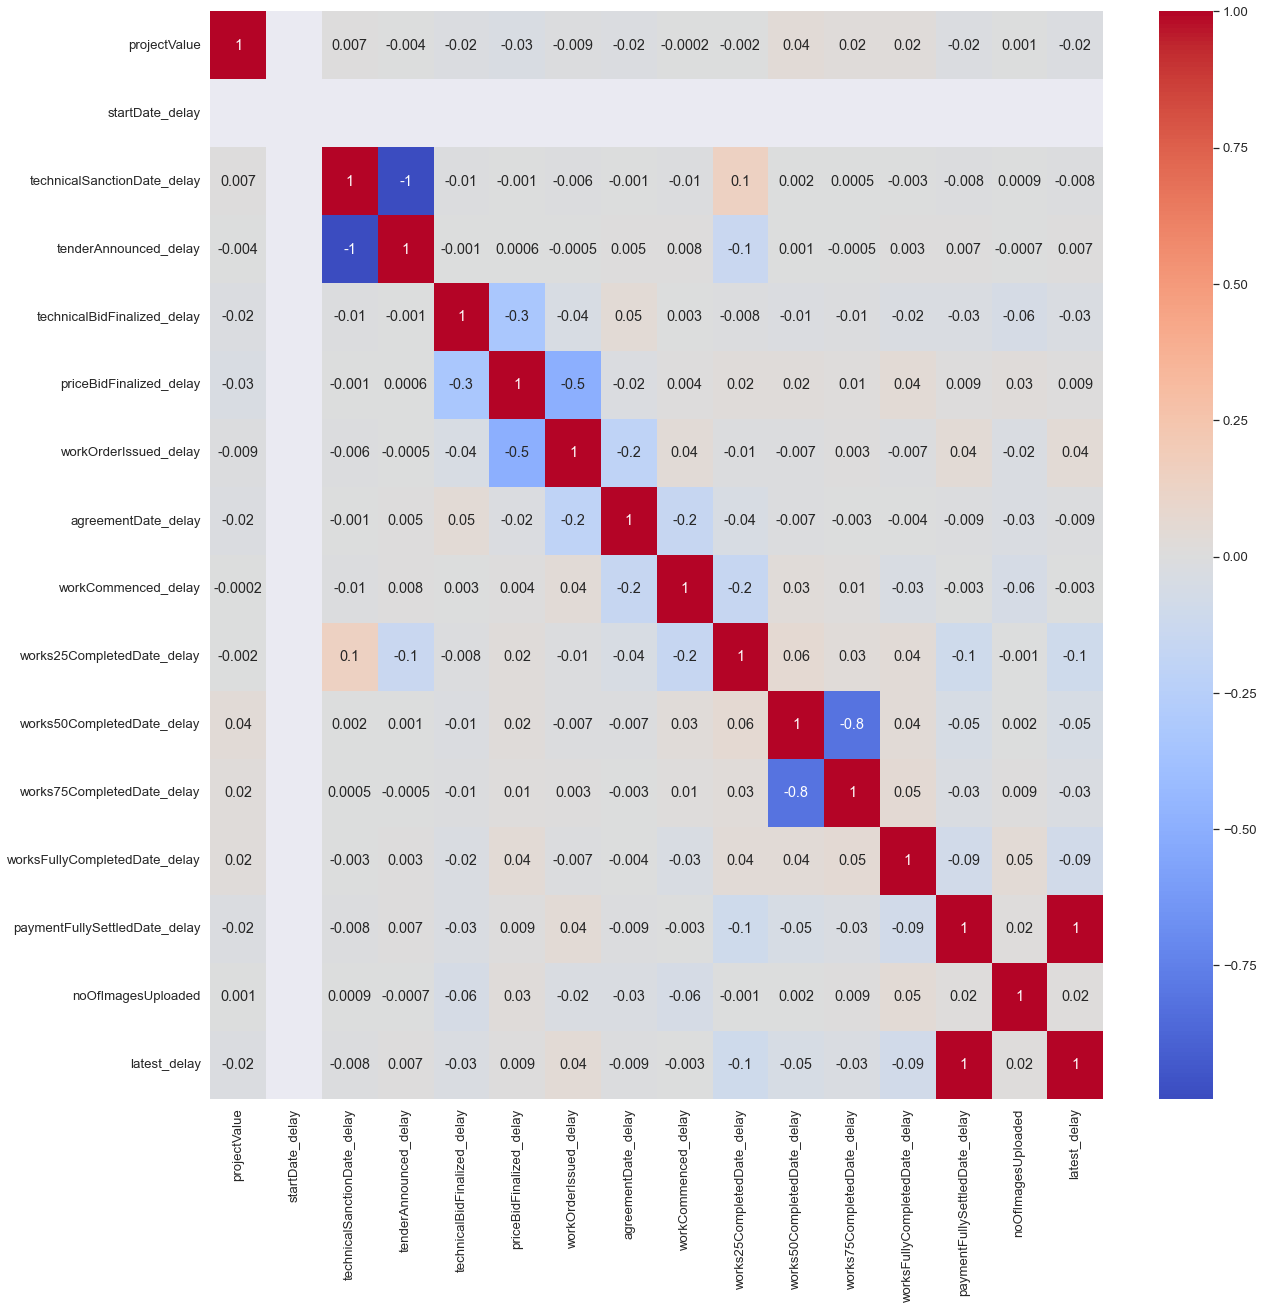

In [46]:
plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g')


In [47]:
# Calculate Delay

df['delayed'] = df.apply(lambda x: x['latest_delay'] > 0 and 1 or 0, axis=1)
df.head()


,Municipality,typeOfWork,projectValue,startDate_delay,technicalSanctionDate_delay,tenderAnnounced_delay,technicalBidFinalized_delay,priceBidFinalized_delay,workOrderIssued_delay,agreementDate_delay,workCommenced_delay,works25CompletedDate_delay,works50CompletedDate_delay,works75CompletedDate_delay,worksFullyCompletedDate_delay,paymentFullySettledDate_delay,noOfImagesUploaded,latest_delay,delayed
0,Mettur,Solid Waste Management,180000.0,0,-15.0,0.0,-12.0,-3.0,5.0,-7.0,76.0,-14.0,-64.0,-14.0,-10.0,227.0,1,227.0,1
1,Ambasamudram,Street Lights,400000.0,0,-30.0,-3.0,-12.0,-3.0,-3.0,-7.0,-7.0,-11.0,-49.0,10.0,-10.0,-6.0,3,-6.0,0
2,Nellikuppam,Other Infrastructure,3000000.0,0,10.0,110.0,-20.0,0.0,-3.0,-7.0,9.0,223.0,0.0,0.0,0.0,0.0,1,0.0,0
3,Krishnagiri,Roads,8055000.0,0,6.0,5.0,-15.0,-2.0,6.0,-7.0,24.0,24.0,-19.0,238.0,0.0,0.0,0,0.0,0
4,Thiruthuraipoondi,Other Infrastructure,300000.0,0,0.0,-3.0,-20.0,-3.0,15.0,-7.0,-6.0,-22.0,-66.0,-22.0,-10.0,33.0,1,33.0,1


In [48]:

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [49]:
df['delayed'].value_counts()

1    2585
0    2317
Name: delayed, dtype: int64

In [50]:
count_no_sub = len(df[df['delayed']==0])
count_sub = len(df[df['delayed']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of delayed Tender is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Non-Delayed", pct_of_sub*100)

percentage of delayed Tender is 47.26642186862505
percentage of Non-Delayed 52.73357813137495


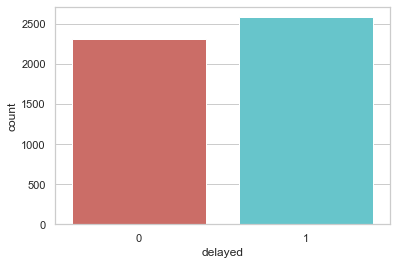

In [51]:

sns.countplot(x ='delayed', data = df, palette='hls')
plt.show()

Text(0, 0.5, 'typeOfWork')

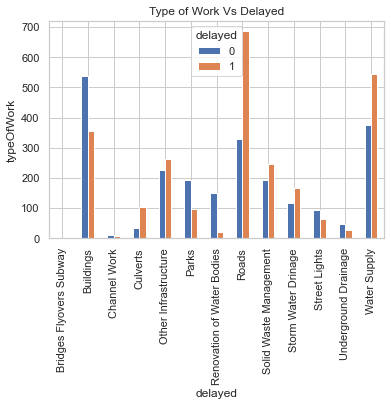

In [52]:
#sns.catplot(data=df, x="typeOfWork", y="delayed",kind='swarm', height=5, aspect=10)
%matplotlib inline
pd.crosstab(df.typeOfWork,df.delayed).plot(kind='bar')
plt.title('Type of Work Vs Delayed')
plt.xlabel('delayed')
plt.ylabel('typeOfWork')

Text(0.5, 0, 'Project Grade')

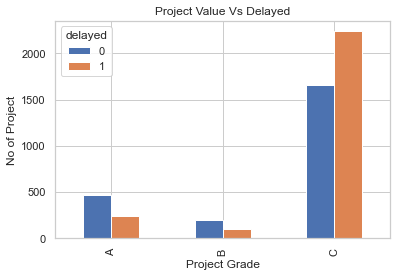

In [53]:
df['projectGrade'] = 'A'
df.loc[df['projectValue'].between(0, 5000000, 'right'), 'projectGrade'] = 'C'
df.loc[df['projectValue'].between(5000000, 10000000, 'right'), 'projectGrade'] = 'B'
df.loc[df['projectValue'].between(10000000, 1000000000, 'right'), 'projectGrade'] = 'A'

%matplotlib inline
pd.crosstab(df.projectGrade,df.delayed).plot(kind='bar')
plt.title('Project Value Vs Delayed')
plt.ylabel('No of Project')
plt.xlabel('Project Grade')


In [54]:
cat_columns = ['Municipality', 'typeOfWork','projectGrade']

# for catColumn in cat_columns:
#      df[catColumn].value_counts(dropna=False)
# df['Region'].value_counts(dropna=False)
df = pd.get_dummies(df, cat_columns, drop_first=True)
# df =  df[df.Region != np.nan]
#df = df.replace(np.nan, 0,regex=true)
#df.fillna(0)
df.head()
df.to_csv('maws-cleaned.csv', header=True, index=False, encoding='utf-8')

Text(0, 0.5, 'Delayed')

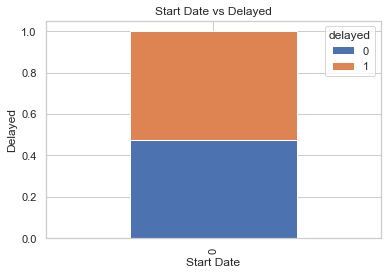

In [55]:
table=pd.crosstab(df.startDate_delay,df.delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Start Date vs Delayed')
plt.xlabel('Start Date')
plt.ylabel('Delayed')


In [56]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
df = df.replace(np.nan, 0,regex=True)
df.fillna(0)
# df.to_csv('maws-cleaned.csv', header=True, index=False, encoding='utf-8')
from imblearn.over_sampling import SMOTE

X = df.loc[:, df.columns != 'delayed']
y = df.loc[:, df.columns == 'delayed']

X.head()

y = np.nan_to_num(y).ravel() 

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['delayed'])

# we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data",
      len(os_data_y[os_data_y['delayed'] == 0]))
print("Number of subscription", len(os_data_y[os_data_y['delayed'] == 1]))
print("Proportion of no subscription data in oversampled data is ",
      len(os_data_y[os_data_y['delayed'] == 0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",
      len(os_data_y[os_data_y['delayed'] == 1])/len(os_data_X))



length of oversampled data is  3668
Number of no subscription in oversampled data 1834
Number of subscription 1834
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [57]:
# from lazypredict.Supervised import LazyRegressor
# reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
# X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.25, random_state=42)
# models,predictions = reg.fit(X_train, X_test, y_train, y_test)
# models

In [58]:
# models

In [59]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression model
clf = Pipeline(steps=[
    ('classifier', LogisticRegression())
])
#X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.25, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model performance
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.4894629503738953


Text(0.5, 1.0, 'ROC Curve')

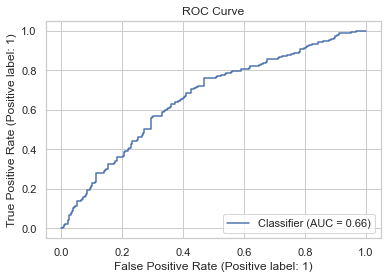

In [60]:
# Plot ROC curve
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('ROC Curve')


Confusion matrix: [[720   0]
 [751   0]]


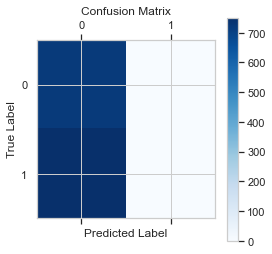

In [61]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', cm)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
# Print classification report
report = classification_report(y_test, y_pred, zero_division=1)
print('Classification report:\n', report)

Classification report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       720
           1       1.00      0.00      0.00       751

    accuracy                           0.49      1471
   macro avg       0.74      0.50      0.33      1471
weighted avg       0.75      0.49      0.32      1471



In [63]:

%%time
# %run TenderSucessPrediction.ipynb
# from qiskit import __qiskit_version__
# print(__qiskit_version__)
# Import necessary libraries

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:

from qiskit.circuit.library import ZZFeatureMap
from qiskit.algorithms.optimizers import SPSA
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC


# Load dataset
feature_dim = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2)
var_form = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
feature_map = feature_map.compose(var_form)


In [ ]:
# https://www.analyticsvidhya.com/blog/2022/02/deploy-your-ml-model-as-a-web-service-in-microsoft-azure-cloud/
import joblib

filename= 'final_mod_v1.pkl'
joblib.dump(clf,open(filename, 'wb'))

In [ ]:
# Create a VQC instance with the SPSA optimizer and the feature map
vqc = VQC(optimizer=SPSA(maxiter=100), feature_map=feature_map)



In [ ]:
# Train the VQC model on the training set
vqc.fit(X_train, y_train)

# # Predict the labels of the test set using the VQC model
# y_pred = vqc.predict(X_test)

# # Evaluate the accuracy of the VQC model
# accuracy = vqc.score(X_test, y_test)

# # Print the accuracy of the model
# print("Accuracy:", accuracy)